# Supervised classification


In [92]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In the data.csv there are letters (uppercases and lowercases) and numbers in a row format, in the cell below load the **data_all.csv** and explore it.


In [2]:
# Your code here
df = pd.read_csv('data_all.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116322 entries, 0 to 116321
Columns: 785 entries, e to 784
dtypes: float64(785)
memory usage: 696.7 MB


In [5]:
df

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116317,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116318,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116319,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Now than you had identified your data, try to define your X and y (target) for next classification models.

In [113]:
# Your code here
X = df.iloc[:,1:]
y =df.e

In [114]:
X = scaler.fit_transform(X)

Before applying any model, you need to know which labels are which, to solve this you need to reshape your X-dataset into 28x28 pixels in a variable called `x_images`. <br> **Hint:** You can use *np.reshape(size of data, 28, 28))*

In [115]:
# Your code here
x_images = X.reshape(X.shape[0],28,28)

In this way, you need to visualize some data to realize which number-labels represents a letter or a number.
<br> **Hint:** You can use *plt.imshow()*

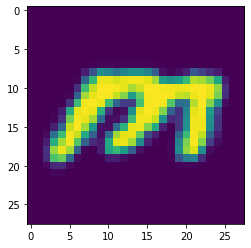

In [116]:
# Your code here
plt.imshow(x_images[259])

In [117]:
#   e from 0 to 9 = numbers
#   e from 10 to 35 = uppercase
#   e from 35 to 61 = lowercase

In [71]:
y[y==61]

134       61.0
149       61.0
328       61.0
419       61.0
622       61.0
          ... 
115581    61.0
115586    61.0
115893    61.0
116057    61.0
116226    61.0
Name: e, Length: 451, dtype: float64

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [128]:
# Your code here
target = y[(10<=y)&(y<=35)]

In [139]:
features = pd.DataFrame(X[target.index], index=target.index)

In [140]:
features

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
X_train, X_test, y_train, y_test = train_test_split(features,target)

In [171]:
model = LogisticRegression(solver='sag',max_iter=2000)

In [172]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, solver='sag')

In [175]:
model.score(X_test, y_test)

0.825698609161669

In [173]:
knn = KNeighborsClassifier()

In [174]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [176]:
knn.score(X_test, y_test)

0.8806941431670282

In [177]:
rfc = RandomForestClassifier()

In [178]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [182]:
rfc.score(X_test, y_test)

0.9088937093275488

In [180]:
etc = ExtraTreesClassifier()

In [181]:
etc.fit(X_train, y_train)

ExtraTreesClassifier()

In [183]:
etc.score(X_test, y_test)

0.9105525073369912

* Try to do the same thing with lowercases.

In [ ]:
# Your code here

In [184]:
target = y[(35<=y)&(y<=61)]

In [185]:
features = pd.DataFrame(X[target.index], index=target.index)

In [186]:
X_train, X_test, y_train, y_test = train_test_split(features,target)

In [187]:
model = LogisticRegression(solver='sag',max_iter=2000)

In [188]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, solver='sag')

In [189]:
model.score(X_test, y_test)

0.7833163784333672

In [190]:
rfc = RandomForestClassifier()

In [191]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [192]:
rfc.score(X_test, y_test)

0.869205057404447

In [193]:
etc = ExtraTreesClassifier()

In [194]:
etc.fit(X_train, y_train)

ExtraTreesClassifier()

In [195]:
etc.score(X_test, y_test)

0.8689144019764569

* Try to do the same thing with numbers.

In [ ]:
# Your code here

In [196]:
target = y[(0<=y)&(y<=9)]

In [197]:
features = pd.DataFrame(X[target.index], index=target.index)

In [198]:
X_train, X_test, y_train, y_test = train_test_split(features,target)

In [199]:
model = LogisticRegression(solver='sag',max_iter=2000)

In [200]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, solver='sag')

In [201]:
model.score(X_test, y_test)

0.9345994475138122

In [202]:
rfc = RandomForestClassifier()

In [203]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [204]:
rfc.score(X_test, y_test)

0.9722375690607735

In [205]:
etc = ExtraTreesClassifier()

In [206]:
etc.fit(X_train, y_train)

ExtraTreesClassifier()

In [207]:
etc.score(X_test, y_test)

0.9749309392265193